# Evaluating Differences In NBA Player Stats based on Era (1996 vs. 2022)
## Using Beautiful Soup, KNN Imputation, Random Forests, and Logistic Regression

### Introduction
Taking data from 1996 and 2022, this project aims to find statistics that help describe the difference between the modern NBA and the NBA of the 1990s. The 90's are typically classified as more aggressive, hard-nosed, and physical. The modern NBA is often described as more fluid, less physical, and is noted for its increase in three point shooting and decline of the mid-range jump shot. Thus, the goal of this project is to identify specific insights that help elucidate these differences, and attempt to find any new, insightful differences between the eras. 

### Scraping and Cleaning Data

In [162]:
# Import Relevant Packages
import pandas as pd
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
from itertools import chain
import requests
from bs4 import BeautifulSoup
import re

We use the BeautifulSoup to obtain Per Game and Advanced statistics from basketball-reference.com. Specifically, we take data from each NBA team from 1996 and 2022. In 1996, the NBA had 29 teams, and a total of 428 players played throughout the season. In 2022, the NBA has 30 teams and a total of 605 players played this season. 

We define a function 'get_nbadata' which scrapes every player's per game data for a particular team. 

In [3]:
def get_nbadata(nba_url2): # define function to scrape data from basketball-reference.com
    t_data = []
    team_request = requests.get(nba_url2) 
    team_soup = BeautifulSoup(team_request.content, 'html.parser')
    team_pergame = team_soup.find(name = 'table', attrs = {'id' : 'per_game'}) # Find the Per Game table


    team_stats = []

    for row in team_pergame.find_all('tr')[1:]:  # Excluding the first 'tr', since that's the table's title head
        player = {} # create empty dictionary to store individual player data
        player['name'] = row.find('a').text.strip()
        player['age'] = row.find('td', {'data-stat' : 'age'}).text
        player['min_pg'] = row.find('td', {'data-stat' : 'mp_per_g'}).text
        player['fg'] = row.find('td', {'data-stat' : 'fg_per_g'}).text
        player['fg_attempted'] = row.find('td', {'data-stat' : 'fga_per_g'}).text
        player['fg_perc'] = row.find('td', {'data-stat' : 'fg_pct'}).text
        player['threes'] = row.find('td', {'data-stat' : 'fg3_per_g'}).text
        player['threes_attempted'] = row.find('td', {'data-stat' : 'fg3a_per_g'}).text
        player['threes_perc'] = row.find('td', {'data-stat' : 'fg3_pct'}).text
        player['rpg'] = row.find('td', {'data-stat' : 'trb_per_g'}).text
        player['apg'] = row.find('td', {'data-stat' : 'ast_per_g'}).text
        player['stl_per_game'] = row.find('td', {'data-stat' : 'stl_per_g'}).text
        player['blk_per_game'] = row.find('td', {'data-stat' : 'blk_per_g'}).text
        player['to_per_game'] = row.find('td', {'data-stat' : 'tov_per_g'}).text
        player['ppg'] = row.find('td', {'data-stat' : 'pts_per_g'}).text
        player['ft'] = row.find('td', {'data-stat' : 'ft_per_g'}).text
        player['ft_attempted'] = row.find('td', {'data-stat' : 'fta_per_g'}).text
        player['ft_perc'] = row.find('td', {'data-stat' : 'ft_pct'}).text

        team_stats.append(player) # append dictionary of players in table to a list of each team
            
    t_data.append(team_stats) # append each team to new list

    return t_data 


nba_urls = ['https://www.basketball-reference.com/teams/CHI/2022.html', 'https://www.basketball-reference.com/teams/LAL/2022.html', 
'https://www.basketball-reference.com/teams/NYK/2022.html','https://www.basketball-reference.com/teams/ATL/2022.html', 'https://www.basketball-reference.com/teams/BOS/2022.html', 
'https://www.basketball-reference.com/teams/CHO/2022.html', 'https://www.basketball-reference.com/teams/CLE/2022.html',
'https://www.basketball-reference.com/teams/DAL/2022.html', 'https://www.basketball-reference.com/teams/DEN/2022.html',
'https://www.basketball-reference.com/teams/DET/2022.html', 'https://www.basketball-reference.com/teams/GSW/2022.html',
'https://www.basketball-reference.com/teams/HOU/2022.html', 'https://www.basketball-reference.com/teams/IND/2022.html',
'https://www.basketball-reference.com/teams/LAC/2022.html', 'https://www.basketball-reference.com/teams/MEM/2022.html',
'https://www.basketball-reference.com/teams/MIA/2022.html', 'https://www.basketball-reference.com/teams/MIL/2022.html',
'https://www.basketball-reference.com/teams/MIN/2022.html', 'https://www.basketball-reference.com/teams/NOP/2022.html',
'https://www.basketball-reference.com/teams/BRK/2022.html', 'https://www.basketball-reference.com/teams/OKC/2022.html',
'https://www.basketball-reference.com/teams/ORL/2022.html', 'https://www.basketball-reference.com/teams/PHI/2022.html',
'https://www.basketball-reference.com/teams/PHO/2022.html', 'https://www.basketball-reference.com/teams/POR/2022.html',
'https://www.basketball-reference.com/teams/SAC/2022.html', 'https://www.basketball-reference.com/teams/TOR/2022.html',
'https://www.basketball-reference.com/teams/SAS/2022.html', 'https://www.basketball-reference.com/teams/UTA/2022.html',
'https://www.basketball-reference.com/teams/WAS/2022.html'] # Take URL's from relevant year

data_rn = [] 
for x in nba_urls:
    data_rn.append(get_nbadata(x)) # append data from each URL to new list

,name,age,min_pg,fg,fg_attempted,fg_perc,threes,threes_attempted,threes_perc,rpg,apg,stl_per_game,blk_per_game,to_per_game,ppg,ft,ft_attempted,ft_perc
0,DeMar DeRozan,32,36.1,10.2,20.2,.504,0.7,1.9,.352,5.2,4.9,0.9,0.3,2.4,27.9,6.8,7.8,.877
1,Zach LaVine,26,34.7,8.4,17.7,.476,2.8,7.1,.389,4.6,4.5,0.6,0.3,2.6,24.4,4.8,5.6,.853
2,Lonzo Ball,24,34.6,4.6,10.9,.423,3.1,7.4,.423,5.4,5.1,1.8,0.9,2.3,13.0,0.6,0.8,.750
3,Nikola Vučević,31,33.1,7.5,15.8,.473,1.4,4.5,.314,11.0,3.2,1.0,1.0,1.9,17.6,1.3,1.7,.760
4,Alex Caruso,27,28.0,2.5,6.2,.398,1.0,3.1,.333,3.6,4.0,1.7,0.4,1.4,7.4,1.4,1.8,.795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,Alize Johnson,25,6.0,0.7,2.0,.333,0.0,0.7,.000,4.0,0.0,0.0,0.0,1.0,1.3,0.0,0.3,.000
711,Cassius Winston,23,5.6,0.6,1.6,.364,0.3,0.9,.333,0.1,1.0,0.0,0.0,0.4,2.0,0.6,0.6,1.000
712,Jordan Goodwin,23,3.0,0.0,1.5,.000,0.0,0.5,.000,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
713,Jaime Echenique,24,3.0,0.0,0.0,,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,


The function 'clean_data' cleans our data and returns a DataFrame that now includes NA values and makes our data types numeric for each column (excpet for 'name'). The function also groups the data by player name, so players who played on multiple teams during the season have their stats averaged into a single stat line. 

In [ ]:
def clean_data(data): # Function to clean and format data
    intermediate = list(chain.from_iterable(data)) # Our data is quite nested. This flattens the data
    cleaned_data = pd.DataFrame(list(chain.from_iterable(intermediate))) # Flatten again, convert to DataFrame
    cleaned_replaced = cleaned_data.replace(r'^\s*$', np.nan, regex=True) # Replace empty columns (previously filled with white space) with NA values

    cols = [i for i in cleaned_replaced.columns if i not in ["name"]]
    for col in cols:
        cleaned_replaced[col] = pd.to_numeric(cleaned_replaced[col]) # Convert columns to numeric, except name column

    cleaned = cleaned_replaced.groupby("name").mean() # Group by player name, so that player's who played on multiple teams 
    cleaned1 = cleaned.reset_index()
    return cleaned1

In [41]:
per_game_data = clean_data(data_rn)

,name,age,min_pg,fg,fg_attempted,fg_perc,threes,threes_attempted,threes_perc,rpg,apg,stl_per_game,blk_per_game,to_per_game,ppg,ft,ft_attempted,ft_perc
0,Aaron Gordon,26,31.70,5.80,11.1,0.520,1.20,3.5,0.3350,5.90,2.50,0.6,0.6,1.80,15.00,2.30,3.1,0.7430
1,Aaron Henry,22,2.80,0.20,0.8,0.200,0.00,0.2,0.0000,0.20,0.00,0.0,0.3,0.30,0.30,0.00,0.0,NaN
2,Aaron Holiday,25,16.25,2.35,5.4,0.439,0.65,1.6,0.3935,2.05,2.65,0.7,0.1,1.15,6.45,1.05,1.2,0.8695
3,Aaron Nesmith,22,11.00,1.40,3.5,0.396,0.60,2.2,0.2700,1.70,0.40,0.4,0.1,0.60,3.80,0.40,0.5,0.8080
4,Aaron Wiggins,23,24.20,3.10,6.7,0.463,0.80,2.8,0.3040,3.60,1.40,0.6,0.2,1.10,8.30,1.20,1.7,0.7290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,Zach LaVine,26,34.70,8.40,17.7,0.476,2.80,7.1,0.3890,4.60,4.50,0.6,0.3,2.60,24.40,4.80,5.6,0.8530
601,Zavier Simpson,24,43.50,4.80,13.0,0.365,0.30,2.0,0.1250,5.30,7.50,1.3,1.0,2.50,11.00,1.30,1.3,1.0000
602,Zeke Nnaji,21,17.00,2.30,4.5,0.516,0.90,2.0,0.4630,3.60,0.40,0.4,0.3,0.60,6.60,1.00,1.6,0.6310
603,Ziaire Williams,20,21.70,3.10,6.8,0.450,1.20,3.9,0.3140,2.10,1.00,0.6,0.2,0.70,8.10,0.70,0.9,0.7820


We repeat the above process for advanced statistics.

In [7]:
def get_advanced(nba_url2):
    t_data = []
    team_request = requests.get(nba_url2)
    team_soup = BeautifulSoup(team_request.content, 'html.parser')
    team_pergame = team_soup.find(name = 'table', attrs = {'id' : 'advanced'})


    team_stats = []
    

    for row in team_pergame.find_all('tr')[1:]:  # Excluding the first 'tr', since that's the table's title head
        a_player = {}
        a_player['name'] = row.find('a').text.strip()
        a_player['per'] = row.find('td', {'data-stat' : 'per'}).text
        a_player['ts_pct'] = row.find('td', {'data-stat' : 'ts_pct'}).text
        a_player['perc_fg_three'] = row.find('td', {'data-stat' : 'fg3a_per_fga_pct'}).text
        a_player['fta_per_fga'] = row.find('td', {'data-stat' : 'fta_per_fga_pct'}).text
        a_player['orb_pct'] = row.find('td', {'data-stat' : 'orb_pct'}).text
        a_player['drb_pct'] = row.find('td', {'data-stat' : 'drb_pct'}).text
        a_player['trb_pct'] = row.find('td', {'data-stat' : 'trb_pct'}).text
        a_player['ast_pct'] = row.find('td', {'data-stat' : 'ast_pct'}).text
        a_player['stl_pct'] = row.find('td', {'data-stat' : 'stl_pct'}).text
        a_player['blk_pct'] = row.find('td', {'data-stat' : 'blk_pct'}).text
        a_player['tov_pct'] = row.find('td', {'data-stat' : 'tov_pct'}).text
        a_player['usg_pct'] = row.find('td', {'data-stat' : 'usg_pct'}).text
        a_player['o_winshare'] = row.find('td', {'data-stat' : 'ows'}).text
        a_player['d_winshare'] = row.find('td', {'data-stat' : 'dws'}).text
        a_player['winshare'] = row.find('td', {'data-stat' : 'ws'}).text
        a_player['ws_per48'] = row.find('td', {'data-stat' : 'ws_per_48'}).text
        a_player['obpm'] = row.find('td', {'data-stat' : 'obpm'}).text
        a_player['dbpm'] = row.find('td', {'data-stat' : 'dbpm'}).text
        a_player['bpm'] = row.find('td', {'data-stat' : 'bpm'}).text
        a_player['vorp'] = row.find('td', {'data-stat' : 'vorp'}).text

        team_stats.append(a_player)
            
    t_data.append(team_stats)

    return t_data


advanced_data = []
for x in nba_urls:
    advanced_data.append(get_advanced(x))


,name,per,ts_pct,perc_fg_three,fta_per_fga,orb_pct,drb_pct,trb_pct,ast_pct,stl_pct,...,tov_pct,usg_pct,o_winshare,d_winshare,winshare,ws_per48,obpm,dbpm,bpm,vorp
0,DeMar DeRozan,23.1,.590,.093,.386,2.3,13.7,8.0,23.3,1.2,...,9.2,31.8,7.0,1.8,8.8,.154,3.4,-0.9,2.5,3.1
1,Nikola Vučević,18.2,.533,.287,.105,6.6,30.7,18.7,15.2,1.4,...,10.1,24.5,1.4,3.2,4.5,.090,0.8,0.1,0.9,1.8
2,Zach LaVine,20.0,.605,.401,.316,1.1,13.8,7.4,20.8,0.9,...,11.2,28.8,4.5,1.3,5.8,.120,3.9,-1.5,2.4,2.6
3,Ayo Dosunmu,11.2,.596,.348,.146,1.4,9.9,5.7,16.5,1.4,...,15.9,14.1,1.7,1.3,3.0,.069,-1.9,-0.1,-2.0,0.0
4,Coby White,12.6,.564,.548,.141,1.1,11.0,6.1,15.0,0.8,...,9.3,19.8,1.6,0.8,2.4,.067,-0.4,-1.7,-2.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,Greg Monroe,25.1,.500,.000,.000,43.8,18.2,30.8,9.0,2.7,...,20.0,24.7,0.0,0.0,0.1,.135,-0.1,-4.3,-4.4,0.0
711,Alize Johnson,5.7,.311,.333,.167,31.3,42.4,36.9,0.0,0.0,...,31.8,23.3,-0.1,0.0,-0.1,-0.183,-7.7,-8.3,-16.1,-0.1
712,Tremont Waters,7.3,.500,.000,.000,0.0,0.0,0.0,0.0,6.2,...,0.0,11.1,0.0,0.0,0.0,.058,-9.4,4.0,-5.4,0.0
713,Jordan Goodwin,-20.4,.000,.333,.000,0.0,18.2,9.2,0.0,0.0,...,0.0,22.2,-0.1,0.0,-0.1,-0.533,-24.7,-9.4,-34.1,0.0


In [43]:
advanced = clean_data(advanced_data)

advanced

,name,per,ts_pct,perc_fg_three,fta_per_fga,orb_pct,drb_pct,trb_pct,ast_pct,stl_pct,...,tov_pct,usg_pct,o_winshare,d_winshare,winshare,ws_per48,obpm,dbpm,bpm,vorp
0,Aaron Gordon,15.3,0.6020,0.3120,0.276,6.10,14.3,10.3,11.60,0.9,...,12.50,19.7,3.20,2.00,5.2,0.1050,0.5,-1.1,-0.60,0.90
1,Aaron Henry,-7.4,0.2000,0.2000,0.000,0.00,6.5,3.3,0.00,0.0,...,28.60,18.5,-0.10,0.00,-0.1,-0.3060,-14.0,-2.4,-16.50,-0.10
2,Aaron Holiday,13.1,0.5425,0.3015,0.215,3.05,10.6,6.9,22.25,2.1,...,15.65,19.0,0.25,0.45,0.7,0.0815,-1.7,0.3,-1.45,0.05
3,Aaron Nesmith,7.3,0.5070,0.6320,0.143,2.90,13.6,8.4,5.40,1.7,...,13.80,17.2,-0.40,0.90,0.4,0.0380,-4.9,0.7,-4.30,-0.30
4,Aaron Wiggins,10.3,0.5560,0.4090,0.252,4.30,11.0,7.6,8.50,1.2,...,12.60,15.3,0.50,0.80,1.2,0.0480,-3.4,-0.9,-4.30,-0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,Zach LaVine,20.0,0.6050,0.4010,0.316,1.10,13.8,7.4,20.80,0.9,...,11.20,28.8,4.50,1.30,5.8,0.1200,3.9,-1.5,2.40,2.60
601,Zavier Simpson,7.7,0.4060,0.1540,0.096,1.20,11.4,6.2,25.20,1.4,...,15.60,15.9,-0.20,0.10,-0.1,-0.0180,-6.0,-1.9,-7.90,-0.30
602,Zeke Nnaji,13.5,0.6290,0.4300,0.349,9.30,14.1,11.8,3.40,1.1,...,9.70,14.9,1.20,0.60,1.8,0.1230,-0.7,-1.6,-2.20,0.00
603,Ziaire Williams,9.7,0.5590,0.5710,0.130,2.00,8.2,5.0,6.30,1.2,...,8.40,14.9,1.10,1.10,2.2,0.0800,-2.4,-0.6,-3.00,-0.30


Now, we merge the two datasets to include each player's per game data and advanced statistics.

In [44]:
all_data = pd.merge(per_game_data, advanced, on ="name") # merge

all_data

,name,age,min_pg,fg,fg_attempted,fg_perc,threes,threes_attempted,threes_perc,rpg,...,tov_pct,usg_pct,o_winshare,d_winshare,winshare,ws_per48,obpm,dbpm,bpm,vorp
0,Aaron Gordon,26,31.70,5.80,11.1,0.520,1.20,3.5,0.3350,5.90,...,12.50,19.7,3.20,2.00,5.2,0.1050,0.5,-1.1,-0.60,0.90
1,Aaron Henry,22,2.80,0.20,0.8,0.200,0.00,0.2,0.0000,0.20,...,28.60,18.5,-0.10,0.00,-0.1,-0.3060,-14.0,-2.4,-16.50,-0.10
2,Aaron Holiday,25,16.25,2.35,5.4,0.439,0.65,1.6,0.3935,2.05,...,15.65,19.0,0.25,0.45,0.7,0.0815,-1.7,0.3,-1.45,0.05
3,Aaron Nesmith,22,11.00,1.40,3.5,0.396,0.60,2.2,0.2700,1.70,...,13.80,17.2,-0.40,0.90,0.4,0.0380,-4.9,0.7,-4.30,-0.30
4,Aaron Wiggins,23,24.20,3.10,6.7,0.463,0.80,2.8,0.3040,3.60,...,12.60,15.3,0.50,0.80,1.2,0.0480,-3.4,-0.9,-4.30,-0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,Zach LaVine,26,34.70,8.40,17.7,0.476,2.80,7.1,0.3890,4.60,...,11.20,28.8,4.50,1.30,5.8,0.1200,3.9,-1.5,2.40,2.60
601,Zavier Simpson,24,43.50,4.80,13.0,0.365,0.30,2.0,0.1250,5.30,...,15.60,15.9,-0.20,0.10,-0.1,-0.0180,-6.0,-1.9,-7.90,-0.30
602,Zeke Nnaji,21,17.00,2.30,4.5,0.516,0.90,2.0,0.4630,3.60,...,9.70,14.9,1.20,0.60,1.8,0.1230,-0.7,-1.6,-2.20,0.00
603,Ziaire Williams,20,21.70,3.10,6.8,0.450,1.20,3.9,0.3140,2.10,...,8.40,14.9,1.10,1.10,2.2,0.0800,-2.4,-0.6,-3.00,-0.30


In [12]:
all_data["year"] = 2022 # add column '2022'

all_data

,name,age,min_pg,fg,fg_attempted,fg_perc,threes,threes_attempted,threes_perc,rpg,...,usg_pct,o_winshare,d_winshare,winshare,ws_per48,obpm,dbpm,bpm,vorp,year
0,Aaron Gordon,26,31.70,5.80,11.1,0.520,1.20,3.5,0.3350,5.90,...,19.7,3.20,2.00,5.2,0.1050,0.5,-1.1,-0.60,0.90,2022
1,Aaron Henry,22,2.80,0.20,0.8,0.200,0.00,0.2,0.0000,0.20,...,18.5,-0.10,0.00,-0.1,-0.3060,-14.0,-2.4,-16.50,-0.10,2022
2,Aaron Holiday,25,16.25,2.35,5.4,0.439,0.65,1.6,0.3935,2.05,...,19.0,0.25,0.45,0.7,0.0815,-1.7,0.3,-1.45,0.05,2022
3,Aaron Nesmith,22,11.00,1.40,3.5,0.396,0.60,2.2,0.2700,1.70,...,17.2,-0.40,0.90,0.4,0.0380,-4.9,0.7,-4.30,-0.30,2022
4,Aaron Wiggins,23,24.20,3.10,6.7,0.463,0.80,2.8,0.3040,3.60,...,15.3,0.50,0.80,1.2,0.0480,-3.4,-0.9,-4.30,-0.70,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,Zach LaVine,26,34.70,8.40,17.7,0.476,2.80,7.1,0.3890,4.60,...,28.8,4.50,1.30,5.8,0.1200,3.9,-1.5,2.40,2.60,2022
601,Zavier Simpson,24,43.50,4.80,13.0,0.365,0.30,2.0,0.1250,5.30,...,15.9,-0.20,0.10,-0.1,-0.0180,-6.0,-1.9,-7.90,-0.30,2022
602,Zeke Nnaji,21,17.00,2.30,4.5,0.516,0.90,2.0,0.4630,3.60,...,14.9,1.20,0.60,1.8,0.1230,-0.7,-1.6,-2.20,0.00,2022
603,Ziaire Williams,20,21.70,3.10,6.8,0.450,1.20,3.9,0.3140,2.10,...,14.9,1.10,1.10,2.2,0.0800,-2.4,-0.6,-3.00,-0.30,2022


Now that we've cleaned and obtained our data from 2022, we repeat the above process for all players from 1996.

In [13]:
nba_urls_1996 = ['https://www.basketball-reference.com/teams/CHI/1996.html', 'https://www.basketball-reference.com/teams/LAL/1996.html', 
'https://www.basketball-reference.com/teams/NYK/1996.html','https://www.basketball-reference.com/teams/ATL/1996.html', 'https://www.basketball-reference.com/teams/BOS/1996.html', 
'https://www.basketball-reference.com/teams/CHH/1996.html', 'https://www.basketball-reference.com/teams/CLE/1996.html',
'https://www.basketball-reference.com/teams/DAL/1996.html', 'https://www.basketball-reference.com/teams/DEN/1996.html',
'https://www.basketball-reference.com/teams/DET/1996.html', 'https://www.basketball-reference.com/teams/GSW/1996.html',
'https://www.basketball-reference.com/teams/HOU/1996.html', 'https://www.basketball-reference.com/teams/IND/1996.html',
'https://www.basketball-reference.com/teams/LAC/1996.html', 'https://www.basketball-reference.com/teams/VAN/1996.html',
'https://www.basketball-reference.com/teams/MIA/1996.html', 'https://www.basketball-reference.com/teams/MIL/1996.html',
'https://www.basketball-reference.com/teams/MIN/1996.html',
'https://www.basketball-reference.com/teams/NJN/1996.html', 'https://www.basketball-reference.com/teams/SEA/1996.html',
'https://www.basketball-reference.com/teams/ORL/1996.html', 'https://www.basketball-reference.com/teams/PHI/1996.html',
'https://www.basketball-reference.com/teams/PHO/1996.html', 'https://www.basketball-reference.com/teams/POR/1996.html',
'https://www.basketball-reference.com/teams/SAC/1996.html', 'https://www.basketball-reference.com/teams/TOR/1996.html',
'https://www.basketball-reference.com/teams/SAS/1996.html', 'https://www.basketball-reference.com/teams/UTA/1996.html',
'https://www.basketball-reference.com/teams/WSB/1996.html']

data_96 = []
for x in nba_urls_1996:
    data_96.append(get_nbadata(x))


,name,age,min_pg,fg,fg_attempted,fg_perc,threes,threes_attempted,threes_perc,rpg,apg,stl_per_game,blk_per_game,to_per_game,ppg,ft,ft_attempted,ft_perc
0,Michael Jordan,32,37.7,11.2,22.6,.495,1.4,3.2,.427,6.6,4.3,2.2,0.5,2.4,30.4,6.7,8.0,.834
1,Scottie Pippen,30,36.7,7.3,15.8,.463,1.9,5.2,.374,6.4,5.9,1.7,0.7,2.7,19.4,2.9,4.2,.679
2,Dennis Rodman,34,32.6,2.3,4.8,.480,0.0,0.4,.111,14.9,2.5,0.6,0.4,2.2,5.5,0.9,1.7,.528
3,Luc Longley,27,26.5,3.9,8.1,.482,0.0,0.0,,5.1,1.9,0.4,1.4,1.8,9.1,1.3,1.7,.777
4,Toni Kukoč,27,26.0,4.8,9.7,.490,1.1,2.7,.403,4.0,3.5,0.8,0.3,1.4,13.1,2.5,3.3,.772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,Michael Curry,27,6.8,0.6,2.0,.300,0.0,0.6,.000,1.0,0.2,0.2,0.0,0.2,2.0,0.8,0.8,1.000
485,Jeff Webster,24,5.3,0.7,2.1,.348,0.2,0.5,.333,0.6,0.3,0.4,0.0,0.3,1.6,0.0,0.0,
486,Bob Thornton,33,4.4,0.1,0.9,.167,0.0,0.0,,1.7,0.0,0.1,0.0,0.1,0.4,0.1,0.3,.500
487,Mike Peplowski,25,2.5,0.0,0.0,,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,


In [45]:
pg_96 = clean_data(data_96)

In [46]:
advanced_data_96 = []
for x in nba_urls_1996:
    advanced_data_96.append(get_advanced(x))

In [47]:
advanced_96 = clean_data(advanced_data_96)

In [48]:
all_data96 = pd.merge(pg_96, advanced_96, on ="name")

In [49]:
all_data96["year"] = 1996

all_data96

,name,age,min_pg,fg,fg_attempted,fg_perc,threes,threes_attempted,threes_perc,rpg,...,usg_pct,o_winshare,d_winshare,winshare,ws_per48,obpm,dbpm,bpm,vorp,year
0,A.C. Green,32.0,25.80,2.6,5.40,0.4840,0.2,0.6,0.2690,6.8,...,13.2,2.70,1.70,4.4,0.1000,-0.4,-0.90,-1.30,0.40,1996
1,Aaron McKie,23.0,27.90,4.2,8.90,0.4670,0.5,1.4,0.3250,3.8,...,18.3,2.10,3.20,5.3,0.1130,-1.3,1.70,0.40,1.40,1996
2,Acie Earl,25.0,15.60,2.8,6.60,0.4240,0.0,0.1,0.0000,3.1,...,25.2,-0.10,0.40,0.3,0.0200,-3.1,-2.00,-5.10,-0.50,1996
3,Adam Keefe,25.0,20.80,2.2,4.20,0.5200,0.0,0.0,0.0000,5.5,...,14.0,2.30,2.30,4.6,0.1300,-0.5,0.00,-0.60,0.60,1996
4,Adrian Caldwell,29.0,6.40,0.9,1.60,0.5540,0.0,0.0,NaN,2.2,...,18.8,-0.20,0.50,0.3,0.0440,-5.1,-0.70,-5.80,-0.30,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,Will Perdue,30.0,17.50,2.2,4.10,0.5230,0.0,0.0,0.0000,6.1,...,15.2,0.70,2.70,3.4,0.1180,-2.3,0.60,-1.70,0.10,1996
424,Willie Anderson,29.0,25.15,3.4,7.85,0.4305,0.4,1.4,0.2525,3.0,...,17.9,-0.05,0.75,0.7,0.0395,-2.8,0.55,-2.25,-0.05,1996
425,Yinka Dare,23.0,10.80,1.1,2.50,0.4380,0.0,0.0,NaN,3.1,...,17.0,-1.40,1.00,-0.5,-0.0370,-9.0,0.30,-8.70,-1.00,1996
426,Šarūnas Marčiulionis,31.0,19.60,3.3,7.30,0.4520,1.2,3.0,0.4080,1.5,...,24.2,1.90,0.70,2.6,0.1200,1.6,-0.30,1.30,0.90,1996


We concatenate our two datasets and do some additional cleaning. We drop the 'name' column, since we're not particularly concerned with who each player is. 

In [24]:
combined_data = pd.concat([all_data, all_data96]) # concatenate

combined_data = combined_data.reset_index(drop = True) # resets index

combined_data_noplayer = combined_data.drop(columns = ["name"]) # drop name column

combined_data_noplayer

,age,min_pg,fg,fg_attempted,fg_perc,threes,threes_attempted,threes_perc,rpg,apg,...,usg_pct,o_winshare,d_winshare,winshare,ws_per48,obpm,dbpm,bpm,vorp,year
0,26.0,31.70,5.80,11.10,0.5200,1.20,3.5,0.3350,5.90,2.50,...,19.7,3.20,2.00,5.2,0.1050,0.5,-1.10,-0.60,0.90,2022
1,22.0,2.80,0.20,0.80,0.2000,0.00,0.2,0.0000,0.20,0.00,...,18.5,-0.10,0.00,-0.1,-0.3060,-14.0,-2.40,-16.50,-0.10,2022
2,25.0,16.25,2.35,5.40,0.4390,0.65,1.6,0.3935,2.05,2.65,...,19.0,0.25,0.45,0.7,0.0815,-1.7,0.30,-1.45,0.05,2022
3,22.0,11.00,1.40,3.50,0.3960,0.60,2.2,0.2700,1.70,0.40,...,17.2,-0.40,0.90,0.4,0.0380,-4.9,0.70,-4.30,-0.30,2022
4,23.0,24.20,3.10,6.70,0.4630,0.80,2.8,0.3040,3.60,1.40,...,15.3,0.50,0.80,1.2,0.0480,-3.4,-0.90,-4.30,-0.70,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,30.0,17.50,2.20,4.10,0.5230,0.00,0.0,0.0000,6.10,0.40,...,15.2,0.70,2.70,3.4,0.1180,-2.3,0.60,-1.70,0.10,1996
1029,29.0,25.15,3.40,7.85,0.4305,0.40,1.4,0.2525,3.00,2.40,...,17.9,-0.05,0.75,0.7,0.0395,-2.8,0.55,-2.25,-0.05,1996
1030,23.0,10.80,1.10,2.50,0.4380,0.00,0.0,NaN,3.10,0.00,...,17.0,-1.40,1.00,-0.5,-0.0370,-9.0,0.30,-8.70,-1.00,1996
1031,31.0,19.60,3.30,7.30,0.4520,1.20,3.0,0.4080,1.50,2.20,...,24.2,1.90,0.70,2.6,0.1200,1.6,-0.30,1.30,0.90,1996


### Imputation

Our dataset contains missing data, most of which is in our three point percentage and free throw percentage columns, as certain players didn't take any three pointers and/or free throws. Furthermore, this missing data doesn't occur at random. That is, our missingness is most likely systematic. Centers and bigs are far less likely to take three pointers, and, thus are more likely to have missingness in their three point percentage column. Thus, we can use K-Nearest Neighbors imputation to impute missing values based on players with otherwise similar statlines. This imputation serves as a better alternative to listwise deletion, which would cause the removal of players who are less likely to, for example, shoot three point shots, like centers and power forwards. 

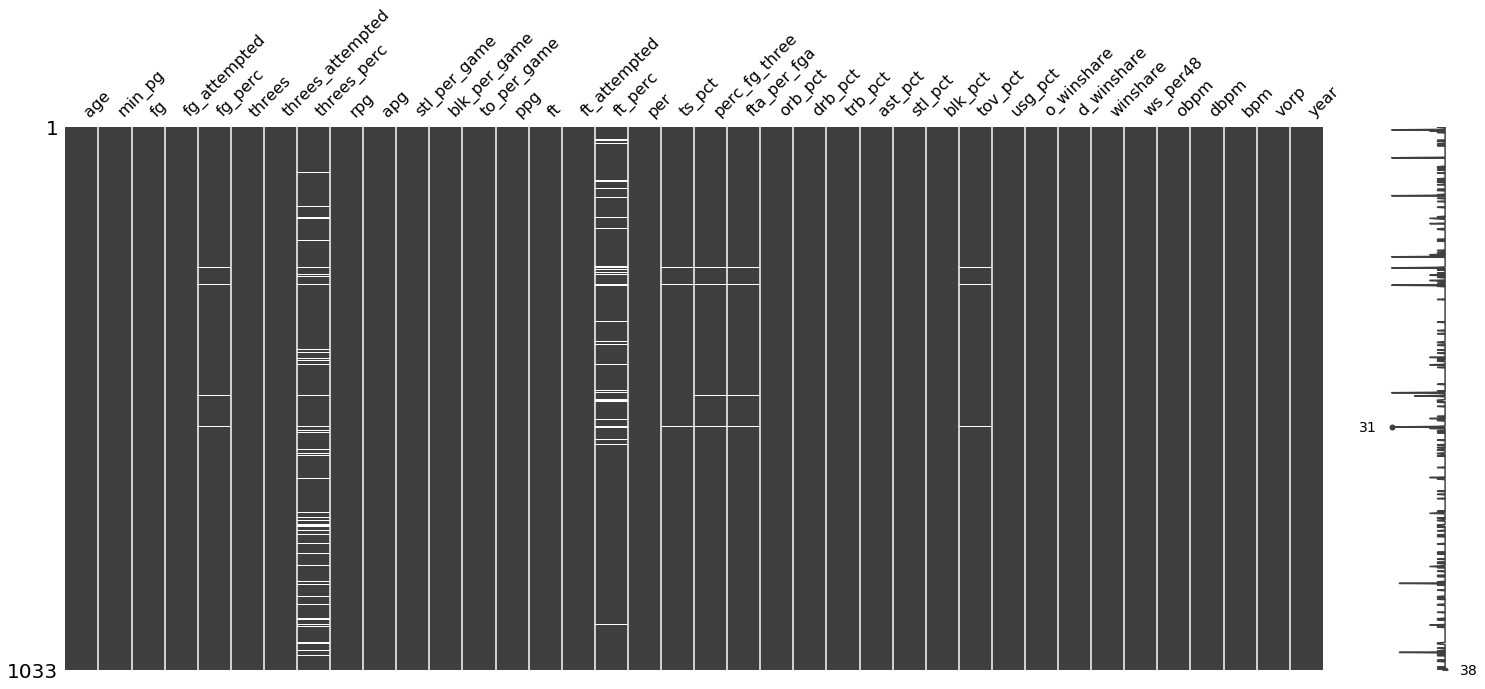

In [164]:
import missingno as msno

msno.matrix(combined_data_noplayer) # Visualize missingness (white spaces represent missing values)

In [183]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors = 2) 

combined_imputed = imputer.fit_transform(combined_data_noplayer)

data_noplayer = pd.DataFrame(combined_imputed, columns = combined_data_noplayer.columns)

data_noplayer = data_noplayer[data_noplayer.min_pg >= 5] # We filter players who averaged more than five minutes per game to help reduce noise

data_noplayer


,age,min_pg,fg,fg_attempted,fg_perc,threes,threes_attempted,threes_perc,rpg,apg,...,usg_pct,o_winshare,d_winshare,winshare,ws_per48,obpm,dbpm,bpm,vorp,year
0,26.0,31.70,5.80,11.10,0.5200,1.20,3.5,0.3350,5.90,2.50,...,19.7,3.20,2.00,5.2,0.1050,0.5,-1.10,-0.60,0.90,2022.0
2,25.0,16.25,2.35,5.40,0.4390,0.65,1.6,0.3935,2.05,2.65,...,19.0,0.25,0.45,0.7,0.0815,-1.7,0.30,-1.45,0.05,2022.0
3,22.0,11.00,1.40,3.50,0.3960,0.60,2.2,0.2700,1.70,0.40,...,17.2,-0.40,0.90,0.4,0.0380,-4.9,0.70,-4.30,-0.30,2022.0
4,23.0,24.20,3.10,6.70,0.4630,0.80,2.8,0.3040,3.60,1.40,...,15.3,0.50,0.80,1.2,0.0480,-3.4,-0.90,-4.30,-0.70,2022.0
5,28.0,10.40,0.90,2.50,0.3430,0.30,1.0,0.2860,1.90,0.50,...,15.0,-0.30,0.30,0.0,-0.0090,-7.1,2.20,-5.00,-0.10,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,30.0,17.50,2.20,4.10,0.5230,0.00,0.0,0.0000,6.10,0.40,...,15.2,0.70,2.70,3.4,0.1180,-2.3,0.60,-1.70,0.10,1996.0
1029,29.0,25.15,3.40,7.85,0.4305,0.40,1.4,0.2525,3.00,2.40,...,17.9,-0.05,0.75,0.7,0.0395,-2.8,0.55,-2.25,-0.05,1996.0
1030,23.0,10.80,1.10,2.50,0.4380,0.00,0.0,0.0000,3.10,0.00,...,17.0,-1.40,1.00,-0.5,-0.0370,-9.0,0.30,-8.70,-1.00,1996.0
1031,31.0,19.60,3.30,7.30,0.4520,1.20,3.0,0.4080,1.50,2.20,...,24.2,1.90,0.70,2.6,0.1200,1.6,-0.30,1.30,0.90,1996.0



### Analysis
#### Random Forests
Now that our data is ready, we can begin analysis. Our data is relatively balanced, as 58 percent of the data comes from 2022 and 42 percent comes from 1996. We start by running a random forest to see if we can predict a player's year based on their stat line, using all variables except for "year" as features, where "year", obviously, is our target variable. We split the data into training and testing sets, train our model, and predict on our test set. 

In [252]:
year_counts = pd.DataFrame(data_noplayer['year'].value_counts()) # find count of each year

In [258]:
year_counts.rename(columns = {'year':'count'}, inplace = True)

year_counts['percent'] = (year_counts['count']/sum(year_counts['count']) * 100) # add columns with percentage

year_counts = year_counts.round(decimals = 2) # limit decimal places to 2

year_counts

,count,percent
2022.0,557,57.9
1996.0,405,42.1


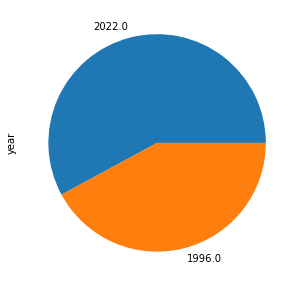

In [218]:
plot = data_noplayer['year'].value_counts().plot.pie(figsize = (5,5)) # visualize balance of data based on year
plot

In [184]:
from sklearn.model_selection import train_test_split

X = data_noplayer.drop(['year'], axis = 1) # Create dataframe of features

y = data_noplayer['year'] # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # Split data



In [199]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 2000, max_depth = 40, random_state = 6) # Create classifier

clf.fit(X_train, y_train) # fit to data

y_pred = clf.predict(X_test) # predict on testing dataa

In [200]:
from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8927335640138409


As shown above, we can predict a player's year with 89 percent accuracy using every variable except our target as a feature. Below, we can find each feature's importance. The percent of field goal attempts that were three pointers was the most important feature, followed by attempted threes and true shooting percentage. This is consistent with our description in the introduction; one of the largest differences between these two eras of basketball is the evolution of the three point shot. 

In [29]:
pd.DataFrame(clf.feature_importances_, index = X.columns).sort_values(by = 0, ascending = False) # Show importance of each feature

,0
perc_fg_three,0.087425
threes_attempted,0.056719
ts_pct,0.056639
tov_pct,0.049180
drb_pct,0.047942
fta_per_fga,0.044498
blk_pct,0.040777
fg_perc,0.038225
threes,0.032223
orb_pct,0.032221


The random forest above uses every variable except the target as a feature, and this leads to a lot of variables being relatively unimportant. Thus, we can try to create a model that predicts with a similar level of accuracy while only 8 features. Specifically, we use percent of field goal attempts that are threes, attempted threes, free throws attempted per field goal attempt, true shooting percentage, turnovers per game, field goal percentage, defensive rebound percentage, and turnover percentage. 

Our new model below can predict with 82 percent accuracy. So, while not as accurate as our first model, this random forest still does a relatively good job at predicting what year a particular player played in. Our confusion matrix shows that the model did a better job of predicting players playing in 2022 than in 1996. In fact, the model predicted about 88 percent of the 2022 players accurately and predicted about 74 percent of 1996 players accurately. Our confusion matrix heatmaps shows this outcome more clearly. 

In [261]:
X1 = data_noplayer[['perc_fg_three', 'threes_attempted', 'fta_per_fga', 'ts_pct', 'to_per_game', 'fg_perc', 'drb_pct', 'tov_pct']] # Limit features to these variables

y = data_noplayer['year']

X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size = 0.3)

In [284]:
clf1 = RandomForestClassifier(n_estimators = 200, max_depth = 6, random_state = 6) # random state allows for random but reproducible results

clf1.fit(X1_train, y_train)

y1_pred = clf1.predict(X1_test)

In [285]:
print("Accuracy:", metrics.accuracy_score(y_test, y1_pred))

Accuracy: 0.8235294117647058


In [286]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y1_pred)
matrix



array([[ 89,  31],
       [ 20, 149]])

Text(0.5, 15.0, 'Predicted Label')

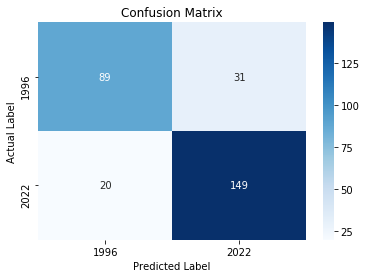

In [287]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ax = sns.heatmap(pd.DataFrame(matrix), annot = True, cmap = "Blues", fmt = 'g') # Create heatmap using matrix as a dataframe
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_xticklabels([1996, 2022])
ax.set_yticklabels([1996, 2022])
plt.tight_layout
plt.title("Confusion Matrix", y = 1.1)
plt.xticks
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")

Text(0.5, 15.0, 'Predicted Label')

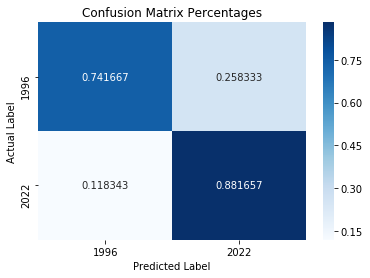

In [291]:
import seaborn as sns

matrix1 = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

ax1 = sns.heatmap(pd.DataFrame(matrix1), annot = True, cmap = "Blues", fmt = 'g') # Plot heatmap with percentage matrix as DataFrame
bottom, top = ax1.get_ylim()
ax1.set_ylim(bottom + 0.5, top - 0.5)
ax1.set_xticklabels([1996, 2022])
ax1.set_yticklabels([1996, 2022])
plt.tight_layout
plt.title("Confusion Matrix Percentages", y = 1.1)
plt.xticks
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")



Again, we evaluate which features were most important in predicting a player's year. Below, we see that percent of field goal attempts that are three pointers was most important, and threes attempted was also an important factor. Factors that may be more surprising or insightful include free throw attempts per field goal attempt and defensive rebound percentage. basketball-reference.com defines defensive rebound percentage as, "An estimate of the percentage of available defensive rebounds a player grabbed while they were on the floor." We want to evaluate these features a bit further. 

In [330]:
feature_imp = pd.DataFrame(clf1.feature_importances_, index = X1.columns).sort_values(by = 0, ascending = False)
feature_imp = feature_imp.reset_index()

feature_imp

,index,0
0,perc_fg_three,0.201385
1,fta_per_fga,0.143715
2,threes_attempted,0.132574
3,drb_pct,0.127234
4,ts_pct,0.111393
5,fg_perc,0.105941
6,tov_pct,0.100841
7,to_per_game,0.076918


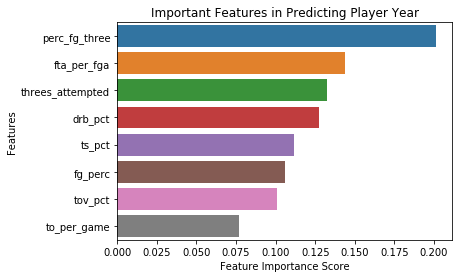

In [309]:
sns.barplot(x = feature_imp[0], y = feature_imp['index'])
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Important Features in Predicting Player Year')
plt.show()

#### T-Tests
By using t-tests, we show that, based on the year players played, the difference in means of both free throw attempts per field goal attempt and defensive rebound percentage are indeed statistically significant, with p-values of 0 and 0.0002, respectively. 

In [315]:
import researchpy as rp

summary, results = rp.ttest(group1= data_noplayer['fta_per_fga'][data_noplayer['year'] == 1996], group1_name= "1996",
                            group2= data_noplayer['fta_per_fga'][data_noplayer['year'] == 2022], group2_name= "2022") # Run T-Test

summary

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,1996,405.0,0.344779,0.172865,0.008590,0.327892,0.361665
1,2022,557.0,0.246229,0.178875,0.007579,0.231341,0.261116
2,combined,962.0,0.287718,0.182877,0.005896,0.276147,0.299289


In [316]:
results

,Independent t-test,results
0,Difference (1996 - 2022) =,0.0985
1,Degrees of freedom =,960.0000
2,t =,8.5565
3,Two side test p value =,0.0000
4,Difference < 0 p value =,1.0000
5,Difference > 0 p value =,0.0000
6,Cohen's d =,0.5588
7,Hedge's g =,0.5583
8,Glass's delta =,0.5701
9,Pearson's r =,0.2662


In [317]:
summary1, results1 = rp.ttest(group1= data_noplayer['drb_pct'][data_noplayer['year'] == 1996], group1_name= "1996",
                            group2= data_noplayer['drb_pct'][data_noplayer['year'] == 2022], group2_name= "2022")

summary1

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,1996,405.0,13.532305,5.702796,0.283374,12.975232,14.089377
1,2022,557.0,15.043776,6.483699,0.274723,14.504154,15.583398
2,combined,962.0,14.407450,6.208976,0.200185,14.014599,14.800301


In [318]:
results1

,Independent t-test,results
0,Difference (1996 - 2022) =,-1.5115
1,Degrees of freedom =,960.0000
2,t =,-3.7531
3,Two side test p value =,0.0002
4,Difference < 0 p value =,0.0001
5,Difference > 0 p value =,0.9999
6,Cohen's d =,-0.2451
7,Hedge's g =,-0.2449
8,Glass's delta =,-0.2650
9,Pearson's r =,0.1203


#### Logistic Regression

Now that we now these differences in means are statistically significant, we use the logistic regression below to help determine the impact of these metrics in determining player year. Shown below, our coefficients indicate that a one unit increase in free throw attempts per field goal attempt multiplies the odds that a player plays in 1996 by 1/exp(-4.58), or about 100. However, most free throw attempts lie in between 0 and 1, so our graph of this logistic regression helps show this impact a little more clearly.

Our defensive rebound percentage coefficient was 0.06, meaning that a one point increase in defensive rebound percentage was associated with exp(0.06), or 1.06, times the odds of playing in 2022. That is, a point increase in defensive rebound percentage was associated with a 6 percent increase in the odds that a player plays in 2022. 

Our logistic regression also included the percent of field goals attempts that were threes. With a coefficient of 3.179, a one point increase in percent of field goal attempts that were threes multiplied the odds that a player played in 2022 by 23. Wow!

In [ ]:
data_noplayer['year_bin'] = np.where(  
    data_noplayer['year'] == 1996, 0, 1) # Create a true binary based on player year to allow for logistic regression

data_noplayer

In [328]:
import statsmodels.api as sm
Xtrain_logit = data_noplayer[['fta_per_fga', 'drb_pct', 'perc_fg_three']]
ytrain_logit = data_noplayer[['year_bin']]

log_reg = sm.Logit(ytrain_logit, Xtrain_logit).fit() # Run Logistic Regression

Optimization terminated successfully.
         Current function value: 0.547767
         Iterations 6


In [329]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               year_bin   No. Observations:                  962
Model:                          Logit   Df Residuals:                      959
Method:                           MLE   Df Model:                            2
Date:                Sun, 05 Jun 2022   Pseudo R-squ.:                  0.1952
Time:                        15:14:42   Log-Likelihood:                -526.95
converged:                       True   LL-Null:                       -654.75
Covariance Type:            nonrobust   LLR p-value:                 3.152e-56
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
fta_per_fga      -4.5896      0.502     -9.143      0.000      -5.573      -3.606
drb_pct           0.0632      0.010      6.078      0.000       0.043       0.084
perc_fg_three     3.1791      0.292     10.892      0.000       2.607       3.751
=================================================================================
"""

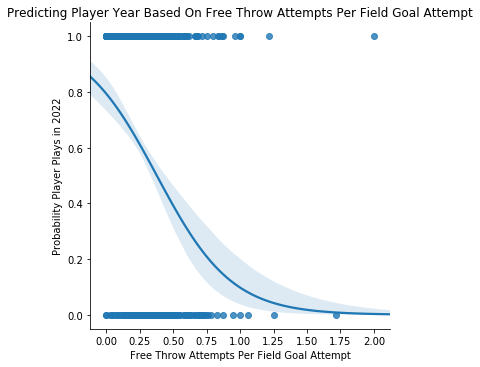

In [313]:
sns.lmplot(x = "fta_per_fga", y = "year_bin", logistic = True, data = data_noplayer)
plt.ylabel("Probability Player Plays in 2022")
plt.xlabel("Free Throw Attempts Per Field Goal Attempt")
plt.title("Predicting Player Year Based On Free Throw Attempts Per Field Goal Attempt")
plt.show()

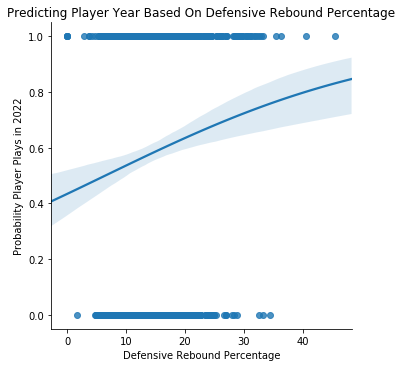

In [331]:
sns.lmplot(x = "drb_pct", y = "year_bin", logistic = True, data = data_noplayer)
plt.ylabel("Probability Player Plays in 2022")
plt.xlabel("Defensive Rebound Percentage")
plt.title("Predicting Player Year Based On Defensive Rebound Percentage")
plt.show()

### Interpretation

Our analysis shows that there is a stark difference in how players played the game in 2022 versus in 1996. In 2022, the three point shot is a hallmark of how the game is played, and this study bears out our assumption regarding the increase in the three point shot in the modern NBA. However, our study alo shows some more interesting ways the game has changed over the past few decades. Players in today's game are less likely to have as many free throw attempts per field goal attempt. This could also be linked to the rise of the three point shot, as fouls are generally less likely to be called on three point shots than on a play in the paint. Furthermore, players today tend to have higher defensive rebounding percentages than players in 1996. This could point to smaller players becoming more avid rebounders in today's game, but this would require some further research. 

Nevertheless, it is evident that, by looking at these two years of basketball, the game is clearly not played the same way. This is why our random forest was able to predict what year a player played in with a relatively high degree of accuracy. How the game evolves over time is fascinating, and the data makes it clear that these changes are legitimate. 

### Limitations

This study contains some limitations that could be addressed further. For example, this study only took data from two years within particular eras. A more comprehensive study would evaluate data from across several years during these eras to ensure that the data in any particular year isn't skewing our results. Furthermore, it is possible that many of our relevant features are not independent of one another. For example, an increase in the three point shots attempted could have a strong inverse correlation with free throw attempts per field goal attempt. Nevertheless, this study is still relatively robust in showing some of the changes that basketball has seen in the past few decades.

### Conclusion
Today's NBA is clearly defined by the three point shot, and it's had a ripple effect on how the game is played. What we see on a day-to-day basis with players shooting three poinnt shots from the logo, passing up on transition layups for open threes, and defining their entire offenses around the three point shot is borne out in our data. The three point shot has, indeed, changed the game. But some changes, which may be a result of this rise in the three point shot, can go unseen. The number of free throws per field goal attempt has gone down and defensive rebound percentage has gone up, both in significant manners. Further study, which would include data from several years during both of these eras, could further reaffirm our findings and evaluate why these metrics changed. Nevertheless, this study confirms some of our pre-existing hypotheses regarding the evolution of the three point shot and found some new insight into important metrics that have also changed in the past few decades of NBA basketball. 